# Project Overview: Analyzing Historical Climatology Data for Ann Arbor, Michigan
In this project (proposed in the course "[Applied Data Science with Python Specialization](https://www.coursera.org/specializations/data-science-python)" of Coursera), we will explore a subset of The National Centers for Environmental Information (NCEI) Global Historical Climatology Network daily (GHCNd) dataset [Global Historical Climatology Network daily (GHCNd)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) (GHCN-Daily)., specifically focusing on the Ann Arbor, Michigan location. The dataset contains daily climate records from land surface stations across the globe. Our objective is to analyze temperature trends and visualize the data effectively using Python in a Jupyter Notebook.

Dataset Information
The dataset is stored in the file: `assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. Each row in this data file corresponds to a single observation from a weather station and includes the following variables:

* **id**: Station identification code

* **date**: Date in YYYY-MM-DD format (e.g., 2012-01-24 = January 24, 2012)

* **element**: Indicator of element type

    * TMAX: Maximum temperature (tenths of degrees C)

    * TMIN: Minimum temperature (tenths of degrees C)

* **value**: Data value for element (tenths of degrees C)

# Step 1
Load the dataset and transform the data into Celsius (refer to documentation) then extract all of the rows which have minimum or maximum temperatures.

__hint: the wanted results are with two DataFrame objects, each with ~80,000 entries in it__

In [1]:
import pandas as pd
df = pd.read_csv('assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [10]:
# In this code cell, transform the Data_Value column into Celsius
df['Data_Value'] = df['Data_Value'] / 10.0

df_min_original = df[df['Element'] == 'TMIN']
df_max_original = df[df['Element'] == 'TMAX']

print(df_min_original.shape)
print(df_max_original.shape)

(82022, 4)
(83063, 4)


# Step 2 

If you did step 1 you have two Series objects with min and max times for the years 2005 through 2015. You can use Pandas `groupby` to create max and min temperature Series objects across all weather stations for each day of these years, and you can deal with the records for February 29 (the leap year) by dropping them.

__hint: the wanted results are with two DataFrame objects, each with exactly 4015 observations in them__

In [13]:
df_max = pd.DataFrame(df_max_original)
df_min = pd.DataFrame(df_min_original)


# create a DataFrame of maximum temperature by date
df_max['Year'], df_max['Day_of_Year'] = pd.to_datetime(df_max['Date']).dt.year, pd.to_datetime(df_max['Date']).dt.strftime('%m-%d')

# create a DataFrame of minimum temperatures by date
df_min['Year'], df_min['Day_of_Year'] = pd.to_datetime(df_min['Date']).dt.year, pd.to_datetime(df_min['Date']).dt.strftime('%m-%d')

# drop the leap days
df_min = df_min[df_min['Day_of_Year'] != '02-29']
df_max = df_max[df_max['Day_of_Year'] != '02-29']

# Get the record high and low temperatures for each day of the year for 2005-2014
record_highs = df_max[(df_max['Year'] >= 2005) & (df_max['Year'] <= 2015)].groupby(['Year','Day_of_Year'])['Data_Value'].max().reset_index()
record_lows = df_min[(df_min['Year'] >= 2005) & (df_min['Year'] <= 2015)].groupby(['Year','Day_of_Year'])['Data_Value'].min().reset_index()

# Rename columns for clarity
record_highs.columns = ['Year','Day_of_Year', 'Record_High']
record_lows.columns = ['Year', 'Day_of_Year', 'Record_Low']

print(record_highs.shape)
print(record_lows.shape)
print(record_highs.head())
print(record_lows.head())

(4015, 3)
(4015, 3)
   Year Day_of_Year  Record_High
0  2005       01-01     0.000016
1  2005       01-02     0.000014
2  2005       01-03     0.000013
3  2005       01-04     0.000004
4  2005       01-05     0.000003
   Year Day_of_Year  Record_Low
0  2005       01-01   -0.000006
1  2005       01-02   -0.000006
2  2005       01-03    0.000000
3  2005       01-04   -0.000004
4  2005       01-05   -0.000009


# Step 3

Now that you have grouped the daily max and min temperatures for each day of the years 2005 through 2015, you can separate out the data for 2015. Then you can use the Pandas `groupby` function to find the max and min of the temperature data for each __day of the year__ for the 2005-2014 data.

__hint: the wanted results are with two DataFrames, one of maximum and the other of minimum values, which each had 365 observations in them. There is also another pair of similar DataFrames but only for the year 2015.__

In [14]:
# calculate the minimum and maximum values for the day of the year for 2005 through 2014

record_highs_2005_2014 = record_highs[(record_highs['Year'] >= 2005) & (record_highs['Year'] < 2015)].groupby('Day_of_Year')['Record_High'].max().reset_index()
record_lows_2005_2014 = record_lows[(record_lows['Year'] >= 2005) & (record_lows['Year'] < 2015)].groupby('Day_of_Year')['Record_Low'].min().reset_index()

print(record_highs_2005_2014.shape)
print(record_lows_2005_2014.shape)

# calculate the minimum and maximum values for the years 2015

highs_2015 = record_highs[record_highs['Year'] == 2015].groupby('Day_of_Year')['Record_High'].max().reset_index()
lows_2015 = record_lows[record_lows['Year'] == 2015].groupby('Day_of_Year')['Record_Low'].min().reset_index()

print(highs_2015.shape)
print(lows_2015.shape)


(365, 2)
(365, 2)
(365, 2)
(365, 2)


# Step 4

Now it's time to plot! You need to explore matplotlib in order to plot line graphs of the min and max temperatures for the years 2005 through 2014 and to scatter plot only the daily 2015 temperatures that exceeded those values.

([<matplotlib.axis.XTick at 0x258fa7ecb30>,
 [Text(0, 0, 'Jan'),
  Text(31, 0, 'Feb'),
  Text(59, 0, 'Mar'),
  Text(90, 0, 'Apr'),
  Text(120, 0, 'May'),
  Text(151, 0, 'Jun'),
  Text(181, 0, 'Jul'),
  Text(212, 0, 'Aug'),
  Text(243, 0, 'Sep'),
  Text(273, 0, 'Oct'),
  Text(304, 0, 'Nov'),
  Text(334, 0, 'Dec')])

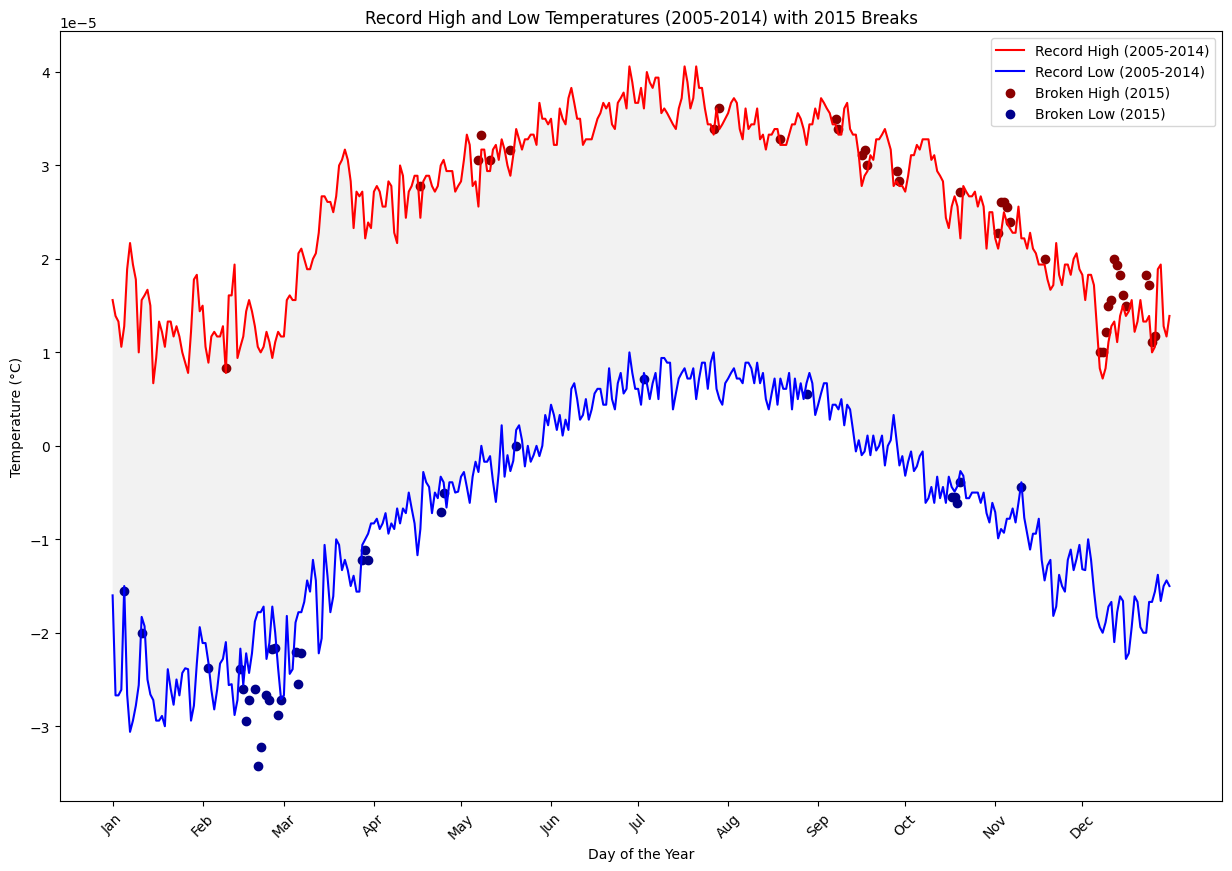

In [15]:
import matplotlib.pyplot as plt
from calendar import month_abbr

# put your plotting code here!


plt.figure(figsize=(15, 10))
# Plot record highs and lows for 2005-2014
plt.plot(record_highs_2005_2014['Day_of_Year'], record_highs_2005_2014['Record_High'], label='Record High (2005-2014)', color='red')
plt.plot(record_lows_2005_2014['Day_of_Year'], record_lows_2005_2014['Record_Low'], label='Record Low (2005-2014)', color='blue')

# Shading the area between record highs and lows
plt.fill_between(record_highs_2005_2014['Day_of_Year'], 
                 record_highs_2005_2014['Record_High'], 
                 record_lows_2005_2014['Record_Low'], 
                 facecolor='gray', alpha=0.1)

# Highlight the days in 2015 where records were broken
broken_highs = highs_2015[highs_2015['Record_High'] > record_highs_2005_2014['Record_High']]
broken_lows = lows_2015[lows_2015['Record_Low'] < record_lows_2005_2014['Record_Low']]

plt.scatter(broken_highs['Day_of_Year'], broken_highs['Record_High'], color='darkred', label='Broken High (2015)')
plt.scatter(broken_lows['Day_of_Year'], broken_lows['Record_Low'], color='darkblue', label='Broken Low (2015)')
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (°C)')
plt.title('Record High and Low Temperatures (2005-2014) with 2015 Breaks')
plt.legend(loc='best')
month_ticks = [f'{i:02d}-01' for i in range(1, 13)]
plt.xticks(ticks=[record_highs_2005_2014[record_highs_2005_2014['Day_of_Year'].str.startswith(month)].index[0] for month in month_ticks],
           labels=[month_abbr[i] for i in range(1, 13)], rotation=45)